In [1]:
import os


import geopandas as gpd
from  fiona import listlayers

#maps
indiamaps='https://github.com/gokussj100/simpleplot/raw/main/maps/india_24383/indiaMaps_24383.gpkg'

#layers in maps
listlayers(indiamaps)

['country', 'cities', 'rivers']

In [2]:
india=gpd.read_file(indiamaps,layer='country')
india_cities=gpd.read_file(indiamaps,layer='cities')
india_rivers=gpd.read_file(indiamaps,layer='rivers')

In [3]:
india.crs.to_epsg()==india_cities.crs.to_epsg()==india_rivers.crs.to_epsg()

True

<Axes: >

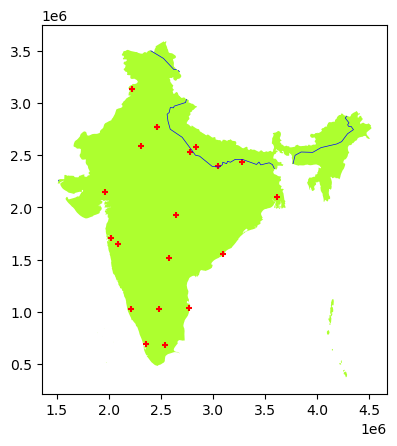

In [4]:
# plotting
base = india.plot(facecolor="greenyellow")
india_rivers.plot(edgecolor='blue', linewidth=0.5,ax=base)
india_cities.plot(marker='+', color='red', markersize=15,ax=base)

In [5]:
india

,COUNTRY,geometry
0,India,"MULTIPOLYGON (((4019310.865 2247364.698, 40125..."


In [6]:
india.boundary

0    MULTILINESTRING ((4019310.865 2247364.698, 401...
dtype: geometry

<Axes: >

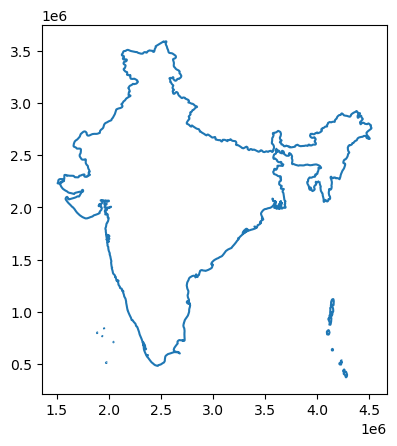

In [7]:
india.boundary.plot()

In [8]:
type(india.boundary)

geopandas.geoseries.GeoSeries

In [9]:
# conversion
india_border=india.boundary.to_frame() 

# new column (optional)
india_border['name']='India' 

# renaming the geometry column
india_border.rename(columns={0:'geometry'},inplace=True) 

#setting the geometry (the name is not enough)
india_border = india_border.set_geometry("geometry")

# verifying:
india_border.crs

<Projected CRS: EPSG:24383>
Name: Kalianpur 1975 / India zone IVa
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: India - mainland onshore south of 15°N.
- bounds: (73.94, 8.02, 80.4, 15.01)
Coordinate Operation:
- name: India zone IVa (1975 metres)
- method: Lambert Conic Conformal (1SP)
Datum: Kalianpur 1975
- Ellipsoid: Everest 1830 (1975 Definition)
- Prime Meridian: Greenwich

In [10]:
india_border

,geometry,name
0,"MULTILINESTRING ((4019310.865 2247364.698, 401...",India


In [11]:
#Exercise 1- Terminado

In [12]:
india_municipalities=gpd.read_file(os.path.join("maps","ind_adm_ibge_2016_shp","polbnda_ind.shp"))
india_states=gpd.read_file(os.path.join("maps","ind_adm_ibge_2016_shp","IND_adm1.shp"))

In [13]:
india_states.crs, india_municipalities.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

<Axes: >

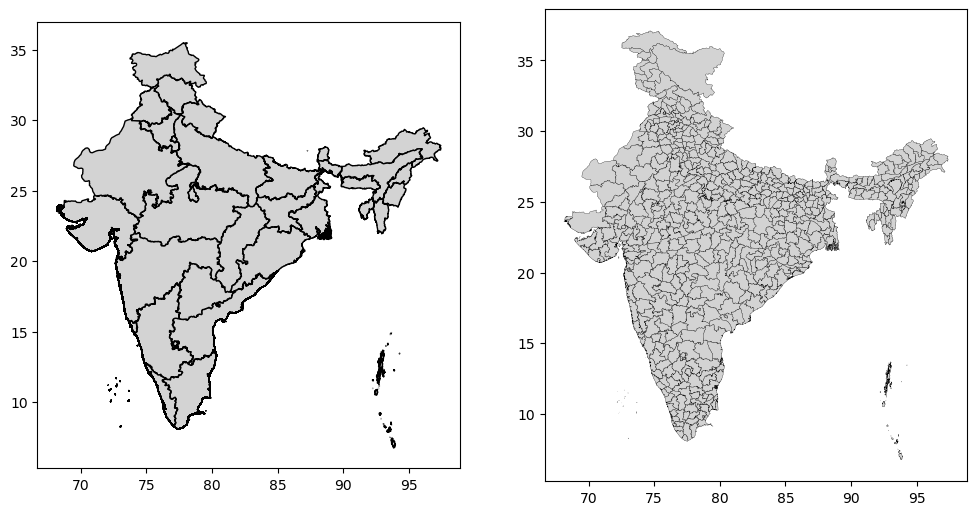

In [14]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

india_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
india_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)


In [15]:
india_states.geometry.head()

0    MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...
1    MULTIPOLYGON (((80.19264 13.52070, 80.19264 13...
2    POLYGON ((96.15778 29.38310, 96.16380 29.37668...
3    MULTIPOLYGON (((89.87145 25.53730, 89.87118 25...
4    MULTIPOLYGON (((88.10548 26.53904, 88.10505 26...
Name: geometry, dtype: geometry

In [16]:
india_states.crs = "EPSG:4326"
india_municipalities.crs = "EPSG:4326"

In [17]:
india_states=india_states.to_crs(24383)
india_municipalities=india_municipalities.to_crs(24383)

In [18]:
india_states.crs, india_municipalities.crs

(<Projected CRS: EPSG:24383>
 Name: Kalianpur 1975 / India zone IVa
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 Area of Use:
 - name: India - mainland onshore south of 15°N.
 - bounds: (73.94, 8.02, 80.4, 15.01)
 Coordinate Operation:
 - name: India zone IVa (1975 metres)
 - method: Lambert Conic Conformal (1SP)
 Datum: Kalianpur 1975
 - Ellipsoid: Everest 1830 (1975 Definition)
 - Prime Meridian: Greenwich,
 <Projected CRS: EPSG:24383>
 Name: Kalianpur 1975 / India zone IVa
 Axis Info [cartesian]:
 - E[east]: Easting (metre)
 - N[north]: Northing (metre)
 Area of Use:
 - name: India - mainland onshore south of 15°N.
 - bounds: (73.94, 8.02, 80.4, 15.01)
 Coordinate Operation:
 - name: India zone IVa (1975 metres)
 - method: Lambert Conic Conformal (1SP)
 Datum: Kalianpur 1975
 - Ellipsoid: Everest 1830 (1975 Definition)
 - Prime Meridian: Greenwich)

In [19]:
#Exercise2 - Terminado

In [20]:
import pandas as pd 
infoairports=pd.read_csv(os.path.join("data","in-airports.csv"))

# see

infoairports

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +name,#country +code +iso2,...,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,26555,VIDP,large_airport,Indira Gandhi International Airport,28.55563,77.09519,777,AS,India,IN,...,New Delhi,1,VIDP,DEL,NaN,http://www.newdelhiairport.in/,https://en.wikipedia.org/wiki/Indira_Gandhi_In...,Palam Air Force Station,51475,2022-02-11T17:31:57+00:00
2,26434,VABB,large_airport,Chhatrapati Shivaji International Airport,19.0886993408,72.8678970337,39,AS,India,IN,...,Mumbai,1,VABB,BOM,NaN,http://www.csia.in/,https://en.wikipedia.org/wiki/Chhatrapati_Shiv...,"Bombay, Sahar International Airport",1014475,2013-04-12T01:27:48+00:00
3,26618,VOMM,large_airport,Chennai International Airport,12.990005,80.169296,52,AS,India,IN,...,Chennai,1,VOMM,MAA,NaN,NaN,https://en.wikipedia.org/wiki/Chennai_Internat...,Madras,51150,2022-09-09T12:28:58+00:00
4,35145,VOBL,large_airport,Kempegowda International Airport,13.1979,77.706299,3000,AS,India,IN,...,Bangalore,1,VOBL,BLR,NaN,http://www.bengaluruairport.com/home/home.jspx,https://en.wikipedia.org/wiki/Kempegowda_Inter...,NaN,51200,2016-02-01T17:54:36+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,340017,IN-0118,heliport,Rushikonda Beach Heliport,17.77966,83.38549,NaN,AS,India,IN,...,Visakhapatnam,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-01-21T17:52:11+00:00
609,340018,IN-0119,heliport,Oxygen Towers Helipad,17.73999,83.31414,NaN,AS,India,IN,...,Visakhapatnam,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-01-21T17:52:56+00:00
610,341820,IN-0233,heliport,MIRC Heliport,19.05024,74.767188,NaN,AS,India,IN,...,Wakodi,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-03-08T16:56:16+00:00
611,340124,IN-0123,heliport,Yanam Heliport,16.7261,82.20674,NaN,AS,India,IN,...,Yanam,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-01-25T19:07:51+00:00


In [21]:
# bye first row 
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)

# keep the  columns needed
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           612 non-null    object
 1   type           612 non-null    object
 2   latitude_deg   612 non-null    object
 3   longitude_deg  612 non-null    object
 4   elevation_ft   365 non-null    object
 5   region_name    612 non-null    object
 6   municipality   543 non-null    object
dtypes: object(7)
memory usage: 33.6+ KB


In [22]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now 
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           612 non-null    object 
 1   type           612 non-null    object 
 2   latitude_deg   612 non-null    float64
 3   longitude_deg  612 non-null    float64
 4   elevation_ft   365 non-null    float64
 5   region_name    612 non-null    object 
 6   municipality   543 non-null    object 
dtypes: float64(3), object(4)
memory usage: 33.6+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

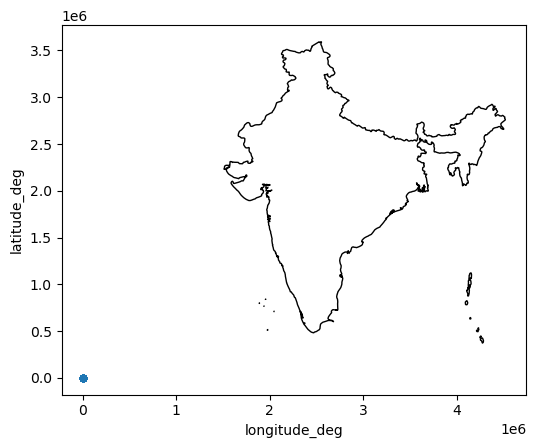

In [23]:
# let's plot

base = india.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [24]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=4326)

In [25]:
airports=airports.to_crs(24383)

<Axes: >

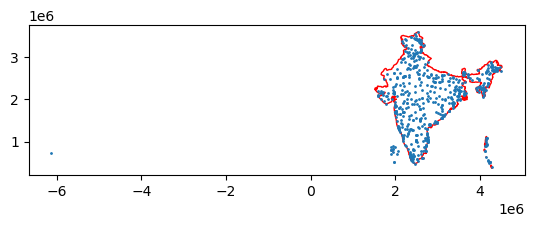

In [26]:
base = india.plot(color='white', edgecolor='red')
airports.plot(ax=base,markersize=1)

In [27]:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

In [28]:
airports['type'].value_counts()

type
heliport          274
small_airport     174
medium_airport    120
closed             33
large_airport      10
seaplane_base       1
Name: count, dtype: int64

In [29]:
airports.rename(columns={'type':'kind'},inplace=True)

In [31]:
from folium import LayerControl


m = airports[airports.kind=='small_airport'].explore(color="red",name="small",show=False)
m = airports[airports.kind=='medium_airport'].explore(m=m, color="blue",name="medium",show=False)
m = airports[airports.kind=='large_airport'].explore(m=m, color="black",name="large",show=True)
m = airports[airports.kind=='seaplane_base'].explore(m=m, color="green",name="seaplane",show=False)
m = airports[airports.kind=='closed'].explore(m=m, color="white",name="closed",show=False)
m = airports[airports.kind=='heliport'].explore(m=m, color="orange",name="heliport",show=False)

LayerControl(collapsed=False).add_to(m) #optional

m

In [50]:
import matplotlib.pyplot as plt

base = india.plot(color='white', edgecolor='red')
mapEnd=airports.plot(ax=base,markersize=1)

plt.savefig(os.path.join("figures",'mapRomania.jpg'))

In [52]:
type(loaded_map)

str

In [ ]:
#Exercise3 - Terminado

In [53]:
centroIndia=india.centroid
centroIndia

0    POINT (2701130.472 2134834.616)
dtype: geometry

In [54]:
type(centroIndia), type(centroIndia.x)

(geopandas.geoseries.GeoSeries, pandas.core.series.Series)

In [55]:
type(centroIndia.x[0]),type(centroIndia.y[0])

(numpy.float64, numpy.float64)

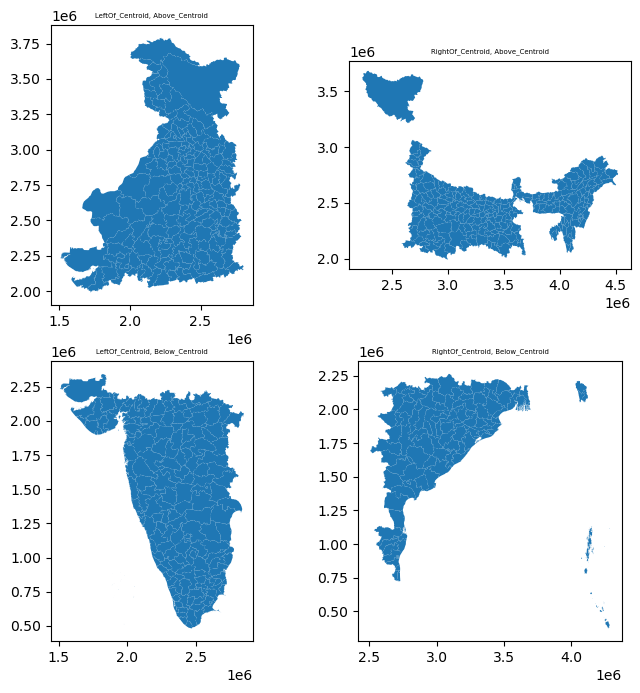

In [56]:
fig, axs = plt.subplots(nrows=2,ncols=2,sharex=False, sharey=False,figsize=(8,8))

centroidX=centroIndia.x[0]
centroidY=centroIndia.y[0]

axs[0,0].set_title('LeftOf_Centroid, Above_Centroid',fontsize=5)
india_municipalities.cx[:centroidX,centroidY:].plot(ax=axs[0,0]) 

axs[0,1].set_title('RightOf_Centroid, Above_Centroid',fontsize=5)
india_municipalities.cx[centroidX:,centroidY:].plot(ax=axs[0,1]) 

axs[1,0].set_title('LeftOf_Centroid, Below_Centroid',fontsize=5)
india_municipalities.cx[:centroidX,:centroidY].plot(ax=axs[1,0]) 

axs[1,1].set_title('RightOf_Centroid, Below_Centroid',fontsize=5)
india_municipalities.cx[centroidX:,:centroidY].plot(ax=axs[1,1]) ;

In [65]:
#instead of:
india_municipalities.cx[:centroidX,centroidY:]

,f_code,coc,nam,laa,pop,ypc,adm_code,salb,soc,geometry
0,FA001,IND,JAMMU AND KASHMIR,GILGIT,-99999999,0,UNK,UNK,IND,"POLYGON Z ((2225649.190 3782783.018 0.000, 222..."
1,FA001,IND,JAMMU AND KASHMIR,TRIBAL TERRITORY,-99999999,0,UNK,UNK,IND,"POLYGON Z ((2064647.924 3638056.604 0.000, 206..."
2,FA001,IND,JAMMU AND KASHMIR,GILGIT WAZARAT,-99999999,0,UNK,UNK,IND,"POLYGON Z ((2260272.847 3522749.486 0.000, 225..."
3,FA001,IND,JAMMU AND KASHMIR,CHILAS,-99999999,0,UNK,UNK,IND,"POLYGON Z ((2168140.029 3618032.183 0.000, 217..."
4,FA001,IND,JAMMU AND KASHMIR,MUZAFFARABAD,-99999999,0,UNK,UNK,IND,"POLYGON Z ((2156461.133 3546983.957 0.000, 215..."
...,...,...,...,...,...,...,...,...,...,...
506,FA001,IND,MADHYA PRADESH,UJJAIN,-99999999,0,UNK,UNK,IND,"POLYGON Z ((2295040.918 2225658.281 0.000, 229..."
507,FA001,IND,MADHYA PRADESH,NARSIMHAPUR,-99999999,0,UNK,UNK,IND,"POLYGON Z ((2618911.990 2164711.616 0.000, 261..."
508,FA001,IND,MADHYA PRADESH,DEWAS,-99999999,0,UNK,UNK,IND,"POLYGON Z ((2338149.651 2167898.938 0.000, 233..."
509,FA001,IND,MADHYA PRADESH,HOSHANGABAD,-99999999,0,UNK,UNK,IND,"POLYGON Z ((2581971.249 2136038.955 0.000, 258..."


In [66]:
india_municipalities.cx[:centroidX,centroidY:].dissolve()

,geometry,f_code,coc,nam,laa,pop,ypc,adm_code,salb,soc
0,MULTIPOLYGON Z (((1698612.438 2010330.625 0.00...,FA001,IND,JAMMU AND KASHMIR,GILGIT,-99999999,0,UNK,UNK,IND


In [67]:
type(india_municipalities.cx[:centroidX,centroidY:].dissolve())

geopandas.geodataframe.GeoDataFrame

<Axes: >

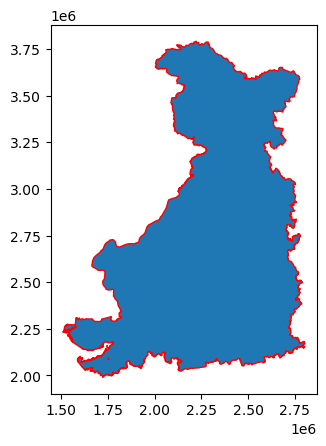

In [68]:
india_municipalities.cx[:centroidX,centroidY:].dissolve().plot(edgecolor='red')

<Axes: >

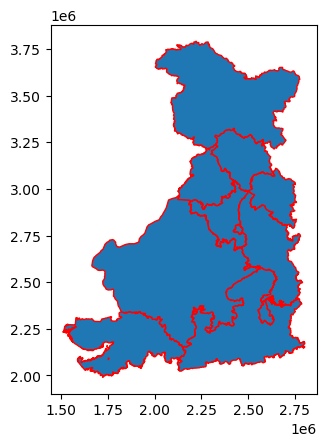

In [70]:
# the municipalities by state
india_municipalities.cx[:centroidX,centroidY:].dissolve(by='nam').plot(edgecolor='red')

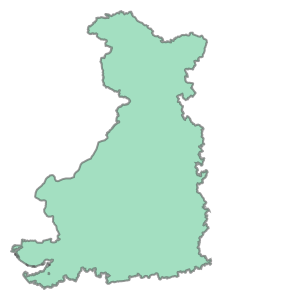

In [71]:
india_municipalities.cx[:centroidX,centroidY:].unary_union

In [72]:
gpd.GeoDataFrame(index=[0],
                 crs=india_municipalities.crs,
                 geometry=[india_municipalities.cx[:centroidX,centroidY:].unary_union])

,geometry
0,MULTIPOLYGON Z (((1698612.438 2010330.625 0.00...


In [73]:
# you create
India_topLeft=india_municipalities.cx[:centroidX,centroidY:].dissolve()
# you get
India_topLeft

,geometry,f_code,coc,nam,laa,pop,ypc,adm_code,salb,soc
0,MULTIPOLYGON Z (((1698612.438 2010330.625 0.00...,FA001,IND,JAMMU AND KASHMIR,GILGIT,-99999999,0,UNK,UNK,IND


In [75]:
India_topLeft['zone']='NW' # add column
India_topLeft=India_topLeft.loc[:,['coc','zone','geometry']]   # keep some

# result
India_topLeft

,coc,zone,geometry
0,IND,NW,MULTIPOLYGON Z (((1698612.438 2010330.625 0.00...


In [77]:
India_topRight=india_municipalities.cx[centroidX:,centroidY:].dissolve()
India_bottomLeft=india_municipalities.cx[:centroidX,:centroidY].dissolve()
India_bottomRight=india_municipalities.cx[centroidX:,:centroidY].dissolve()
India_topRight['zone']='NE'
India_topRight=India_topRight.loc[:,['coc','zone','geometry']] 
India_bottomLeft['zone']='NE'
India_bottomLeft=India_bottomLeft.loc[:,['coc','zone','geometry']] 
India_bottomRight['zone']='NE'
India_bottomRight=India_bottomRight.loc[:,['coc','zone','geometry']] 

In [78]:
india_municipalities

,f_code,coc,nam,laa,pop,ypc,adm_code,salb,soc,geometry
0,FA001,IND,JAMMU AND KASHMIR,GILGIT,-99999999,0,UNK,UNK,IND,"POLYGON Z ((2225649.190 3782783.018 0.000, 222..."
1,FA001,IND,JAMMU AND KASHMIR,TRIBAL TERRITORY,-99999999,0,UNK,UNK,IND,"POLYGON Z ((2064647.924 3638056.604 0.000, 206..."
2,FA001,IND,JAMMU AND KASHMIR,GILGIT WAZARAT,-99999999,0,UNK,UNK,IND,"POLYGON Z ((2260272.847 3522749.486 0.000, 225..."
3,FA001,IND,JAMMU AND KASHMIR,CHILAS,-99999999,0,UNK,UNK,IND,"POLYGON Z ((2168140.029 3618032.183 0.000, 217..."
4,FA001,IND,JAMMU AND KASHMIR,MUZAFFARABAD,-99999999,0,UNK,UNK,IND,"POLYGON Z ((2156461.133 3546983.957 0.000, 215..."
...,...,...,...,...,...,...,...,...,...,...
1205,FA001,IND,ANDAMAN AND NICOBAR,NICOBAR,-99999999,0,UNK,UNK,IND,"POLYGON Z ((4263516.964 443051.779 0.000, 4263..."
1206,FA001,IND,ANDAMAN AND NICOBAR,NICOBAR,-99999999,0,UNK,UNK,IND,"POLYGON Z ((4272598.846 431292.697 0.000, 4272..."
1207,FA001,IND,ANDAMAN AND NICOBAR,NICOBAR,-99999999,0,UNK,UNK,IND,"POLYGON Z ((4251536.347 425708.188 0.000, 4250..."
1208,FA001,IND,ANDAMAN AND NICOBAR,NICOBAR,-99999999,0,UNK,UNK,IND,"POLYGON Z ((4258787.265 422114.500 0.000, 4258..."


In [79]:
# tuple with count of rows
rowsCX=(india_municipalities.cx[:centroIndia.x[0],centroIndia.y[0]:].shape[0],\
        india_municipalities.cx[centroIndia.x[0]:,centroIndia.y[0]:].shape[0],\
        india_municipalities.cx[:centroIndia.x[0],:centroIndia.y[0]].shape[0],\
        india_municipalities.cx[centroIndia.x[0]:,:centroIndia.y[0]].shape[0])

sum(rowsCX)

1292

In [98]:
coincidences = (
    len(
        set(india_municipalities.cx[:centroIndia.x[0], centroIndia.y[0]:]['pop']).intersection(
        set(india_municipalities.cx[centroIndia.x[0]:, centroIndia.y[0]:]['pop'])).intersection(
        set(india_municipalities.cx[:centroIndia.x[0], :centroIndia.y[0]]['pop'])).intersection(
        set(india_municipalities.cx[centroIndia.x[0]:, :centroIndia.y[0]]['pop']))
    )
)


In [104]:
india_municipalities.shape[0]

1210

In [110]:
from shapely.ops import unary_union
geometries_norte = unary_union([India_topLeft['geometry'].unary_union, India_topRight['geometry'].unary_union])
geometries_sur = unary_union([India_bottomLeft['geometry'].unary_union, India_bottomRight['geometry'].unary_union])

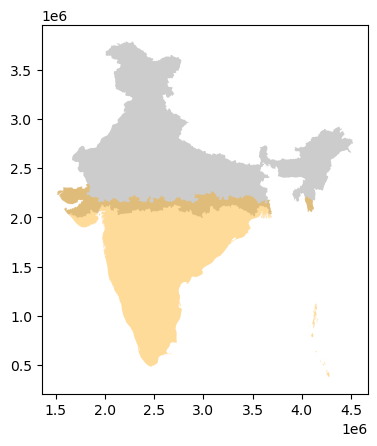

In [113]:
import geopandas as gpd
import matplotlib.pyplot as plt
gdf_norte = gpd.GeoDataFrame(geometry=[geometries_norte])
gdf_sur = gpd.GeoDataFrame(geometry=[geometries_sur])
base = gdf_norte.plot(facecolor='grey', alpha=0.4)
gdf_sur.plot(ax=base, facecolor='orange', alpha=0.4)
plt.show()

In [ ]:
#Exercise4 - Terminado

In [115]:
India_AirTopLeft=airports[airports.kind=='medium_airport'].cx[:centroidX,centroidY:]
India_AirTopRight=airports[airports.kind=='medium_airport'].cx[centroidX:,centroidY:]
India_AirBottomLeft=airports[airports.kind=='medium_airport'].cx[:centroidX,:centroidY]
India_AirBottomRight=airports[airports.kind=='medium_airport'].cx[centroidX:,:centroidY]

<Axes: >

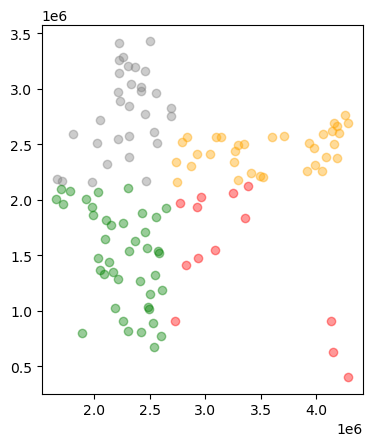

In [117]:
base=India_AirTopLeft.plot(facecolor='grey', alpha=0.4)
India_AirTopRight.plot(ax=base,facecolor='orange', alpha=0.4)
India_AirBottomLeft.plot(ax=base,facecolor='green', alpha=0.4)
India_AirBottomRight.plot(ax=base,facecolor='red', alpha=0.4)

In [118]:
India_AirBottomLeft

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
11,Pune Airport / Lohagaon Air Force Station,medium_airport,18.582100,73.919701,1942.0,Maharashtra,Pune,POINT (2098140.484 1650400.200)
12,HAL Airport,medium_airport,12.950000,77.668198,2912.0,Karnataka,Bangalore,POINT (2490618.601 1020275.341)
14,Vadodara Airport,medium_airport,22.336201,73.226303,129.0,Gujarat,Vadodara,POINT (2034891.568 2071771.274)
17,Mangalore International Airport,medium_airport,12.961300,74.890099,337.0,Karnataka,Mangalore,POINT (2189553.881 1025589.518)
20,Calicut International Airport,medium_airport,11.136800,75.955299,342.0,Kerala,Calicut,POINT (2302030.810 822099.092)
22,Coimbatore International Airport,medium_airport,11.030000,77.043404,1324.0,Tamil Nadu,Coimbatore,POINT (2420624.633 808790.732)
24,Begumpet Airport,medium_airport,17.453100,78.467598,1742.0,Telangana,Hyderabad,POINT (2580035.923 1518233.838)
26,Devi Ahilyabai Holkar Airport,medium_airport,22.721800,75.801102,1850.0,Madhya Pradesh,Indore,POINT (2304826.958 2109788.529)
27,Madurai Airport,medium_airport,9.834510,78.093399,459.0,Tamil Nadu,Madurai,POINT (2534322.740 675657.923)
32,Dr. Babasaheb Ambedkar International Airport,medium_airport,21.092199,79.047203,1033.0,Maharashtra,Nagpur,POINT (2643213.578 1923640.982)


<Axes: >

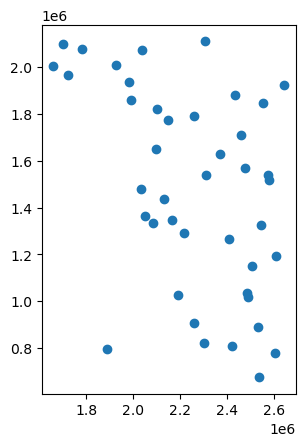

In [119]:
India_AirBottomLeft.convex_hull.plot()

<Axes: >

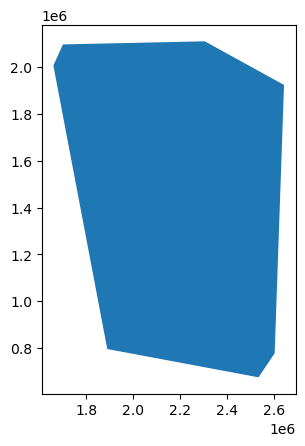

In [120]:
India_AirBottomLeft.dissolve().convex_hull.plot()

In [121]:
India_AirBottomLeft.dissolve().convex_hull

0    POLYGON ((2534322.740 675657.923, 1888764.030 ...
dtype: geometry

<Axes: >

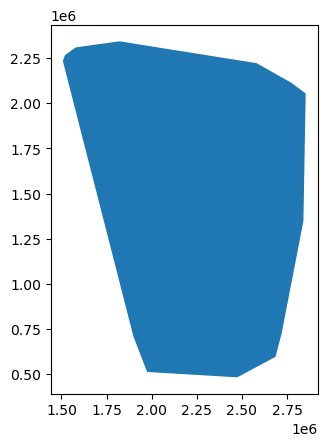

In [122]:
India_bottomLeft.convex_hull.plot()

<Axes: >

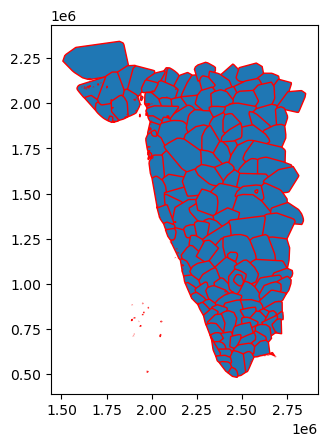

In [123]:
india_municipalities.cx[:centroidX,:centroidY].convex_hull.plot(edgecolor='red')

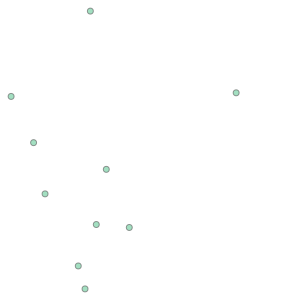

In [124]:
large_airport=airports[airports.kind=='large_airport']
large_airport.unary_union

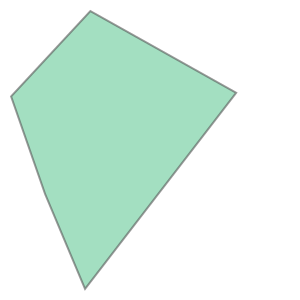

In [125]:
large_airport.unary_union.convex_hull

In [126]:
LargeAirport_hull= gpd.GeoDataFrame(index=[0],
                                    crs=large_airport.crs,
                                    geometry=[large_airport.unary_union.convex_hull])
LargeAirport_hull['name']='large airports hull' # optional

# then

LargeAirport_hull

,geometry,name
0,"POLYGON ((2404017.260 527249.562, 2080820.028 ...",large airports hull


<Axes: >

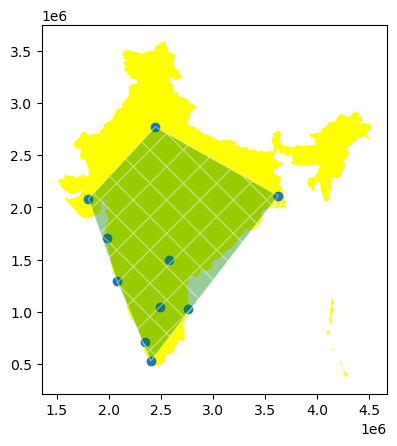

In [127]:
base=india.plot(facecolor='yellow')
large_airport.plot(ax=base)
LargeAirport_hull.plot(ax=base,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')

In [128]:
#Exercise5-Terminado

In [130]:
# the north
MunisN_india=india_municipalities.cx[:,centroidY:]
# the south
MunisS_india=india_municipalities.cx[:,:centroidY]
# the west
MunisW_india=india_municipalities.cx[:centroidX,:]
# the east
MunisE_india=india_municipalities.cx[centroidX:,:]

In [135]:
munisMidNS_india=MunisN_india.overlay(MunisS_india, how="intersection",keep_geom_type=True)
munisMidNS_india

,f_code_1,coc_1,nam_1,laa_1,pop_1,ypc_1,adm_code_1,salb_1,soc_1,f_code_2,coc_2,nam_2,laa_2,pop_2,ypc_2,adm_code_2,salb_2,soc_2,geometry
0,FA001,IND,GUJARAT,KACHCHH,-99999999,0,UNK,UNK,IND,FA001,IND,GUJARAT,KACHCHH,-99999999,0,UNK,UNK,IND,"POLYGON Z ((1841599.136 2327441.541 0.000, 184..."
1,FA001,IND,GUJARAT,SURENDRANAGAR,-99999999,0,UNK,UNK,IND,FA001,IND,GUJARAT,SURENDRANAGAR,-99999999,0,UNK,UNK,IND,"POLYGON Z ((1907356.282 2209977.005 0.000, 190..."
2,FA001,IND,GUJARAT,RAJKOT,-99999999,0,UNK,UNK,IND,FA001,IND,GUJARAT,RAJKOT,-99999999,0,UNK,UNK,IND,"POLYGON Z ((1773510.385 2167907.728 0.000, 177..."
3,FA001,IND,GUJARAT,KACHCHH,-99999999,0,UNK,UNK,IND,FA001,IND,GUJARAT,KACHCHH,-99999999,0,UNK,UNK,IND,"POLYGON Z ((1651558.984 2134140.333 0.000, 165..."
4,FA001,IND,GUJARAT,KACHCHH,-99999999,0,UNK,UNK,IND,FA001,IND,GUJARAT,KACHCHH,-99999999,0,UNK,UNK,IND,"POLYGON Z ((1659877.471 2133830.629 0.000, 165..."
5,FA001,IND,GUJARAT,JAMNAGAR,-99999999,0,UNK,UNK,IND,FA001,IND,GUJARAT,JAMNAGAR,-99999999,0,UNK,UNK,IND,"POLYGON Z ((1759067.630 2144948.132 0.000, 175..."
6,FA001,IND,GUJARAT,AHMADABAD,-99999999,0,UNK,UNK,IND,FA001,IND,GUJARAT,AHMADABAD,-99999999,0,UNK,UNK,IND,"POLYGON Z ((1911055.812 2206568.471 0.000, 191..."
7,FA001,IND,GUJARAT,PANCHTALUKS,-99999999,0,UNK,UNK,IND,FA001,IND,GUJARAT,PANCHTALUKS,-99999999,0,UNK,UNK,IND,"POLYGON Z ((2080372.888 2196144.231 0.000, 208..."
8,FA001,IND,GUJARAT,KHEDA,-99999999,0,UNK,UNK,IND,FA001,IND,GUJARAT,KHEDA,-99999999,0,UNK,UNK,IND,"POLYGON Z ((2015526.778 2165225.937 0.000, 201..."
9,FA001,IND,GUJARAT,DAHOD,-99999999,0,UNK,UNK,IND,FA001,IND,GUJARAT,DAHOD,-99999999,0,UNK,UNK,IND,"POLYGON Z ((2089758.197 2192293.798 0.000, 209..."


In [136]:
MunisN_india.sjoin(MunisS_india, how="inner", predicate='contains')

,f_code_left,coc_left,nam_left,laa_left,pop_left,ypc_left,adm_code_left,salb_left,soc_left,geometry,index_right,f_code_right,coc_right,nam_right,laa_right,pop_right,ypc_right,adm_code_right,salb_right,soc_right
338,FA001,IND,GUJARAT,KACHCHH,-99999999,0,UNK,UNK,IND,"POLYGON Z ((1842101.692 2327765.771 0.000, 184...",338,FA001,IND,GUJARAT,KACHCHH,-99999999,0,UNK,UNK,IND
344,FA001,IND,GUJARAT,KACHCHH,-99999999,0,UNK,UNK,IND,"POLYGON Z ((1651997.531 2134079.192 0.000, 165...",344,FA001,IND,GUJARAT,KACHCHH,-99999999,0,UNK,UNK,IND
345,FA001,IND,GUJARAT,KACHCHH,-99999999,0,UNK,UNK,IND,"POLYGON Z ((1660266.831 2133690.865 0.000, 165...",345,FA001,IND,GUJARAT,KACHCHH,-99999999,0,UNK,UNK,IND
363,FA001,IND,GUJARAT,JAMNAGAR,-99999999,0,UNK,UNK,IND,"POLYGON Z ((1757430.640 2146651.283 0.000, 175...",363,FA001,IND,GUJARAT,JAMNAGAR,-99999999,0,UNK,UNK,IND
389,FA001,IND,GUJARAT,SURENDRANAGAR,-99999999,0,UNK,UNK,IND,"POLYGON Z ((1907352.256 2209975.183 0.000, 190...",389,FA001,IND,GUJARAT,SURENDRANAGAR,-99999999,0,UNK,UNK,IND
390,FA001,IND,GUJARAT,AHMADABAD,-99999999,0,UNK,UNK,IND,"POLYGON Z ((1910395.697 2206743.613 0.000, 191...",390,FA001,IND,GUJARAT,AHMADABAD,-99999999,0,UNK,UNK,IND
391,FA001,IND,GUJARAT,PANCHTALUKS,-99999999,0,UNK,UNK,IND,"POLYGON Z ((2079820.616 2196389.376 0.000, 208...",391,FA001,IND,GUJARAT,PANCHTALUKS,-99999999,0,UNK,UNK,IND
392,FA001,IND,GUJARAT,DAHOD,-99999999,0,UNK,UNK,IND,"POLYGON Z ((2089581.879 2191916.457 0.000, 208...",392,FA001,IND,GUJARAT,DAHOD,-99999999,0,UNK,UNK,IND
395,FA001,IND,MADHYA PRADESH,JHABUA,-99999999,0,UNK,UNK,IND,"POLYGON Z ((2200406.869 2169246.353 0.000, 220...",395,FA001,IND,MADHYA PRADESH,JHABUA,-99999999,0,UNK,UNK,IND
396,FA001,IND,GUJARAT,RAJKOT,-99999999,0,UNK,UNK,IND,"POLYGON Z ((1772753.581 2167632.273 0.000, 177...",396,FA001,IND,GUJARAT,RAJKOT,-99999999,0,UNK,UNK,IND


<Axes: >

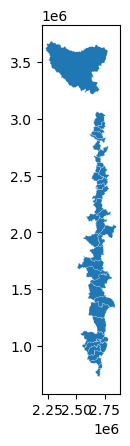

In [137]:
# keeping the overlay
munisMidWE_india=MunisW_india.overlay(MunisE_india, how="intersection",keep_geom_type=True)
munisMidWE_india.plot(edgecolor='white',linewidth=0.1)

In [138]:
munisMidNS_india.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   f_code_1    40 non-null     object  
 1   coc_1       40 non-null     object  
 2   nam_1       40 non-null     object  
 3   laa_1       40 non-null     object  
 4   pop_1       40 non-null     int64   
 5   ypc_1       40 non-null     int64   
 6   adm_code_1  40 non-null     object  
 7   salb_1      40 non-null     object  
 8   soc_1       40 non-null     object  
 9   f_code_2    40 non-null     object  
 10  coc_2       40 non-null     object  
 11  nam_2       40 non-null     object  
 12  laa_2       40 non-null     object  
 13  pop_2       40 non-null     int64   
 14  ypc_2       40 non-null     int64   
 15  adm_code_2  40 non-null     object  
 16  salb_2      40 non-null     object  
 17  soc_2       40 non-null     object  
 18  geometry    40 non-null     geometry
dtypes:

In [139]:
munisMidWE_india.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   f_code_1    41 non-null     object  
 1   coc_1       41 non-null     object  
 2   nam_1       41 non-null     object  
 3   laa_1       41 non-null     object  
 4   pop_1       41 non-null     int64   
 5   ypc_1       41 non-null     int64   
 6   adm_code_1  41 non-null     object  
 7   salb_1      41 non-null     object  
 8   soc_1       41 non-null     object  
 9   f_code_2    41 non-null     object  
 10  coc_2       41 non-null     object  
 11  nam_2       41 non-null     object  
 12  laa_2       41 non-null     object  
 13  pop_2       41 non-null     int64   
 14  ypc_2       41 non-null     int64   
 15  adm_code_2  41 non-null     object  
 16  salb_2      41 non-null     object  
 17  soc_2       41 non-null     object  
 18  geometry    41 non-null     geometry
dtypes:

In [140]:
keep=['f_code_1','coc_1','ypc_1','geometry']
munisMidNS_india=munisMidNS_india.loc[:,keep]
munisMidWE_india=munisMidWE_india.loc[:,keep]

In [141]:
munisMidNS_india.overlay(munisMidWE_india,how="union",keep_geom_type=True)

,f_code_1_1,coc_1_1,ypc_1_1,f_code_1_2,coc_1_2,ypc_1_2,geometry
0,FA001,IND,0.0,FA001,IND,0.0,"POLYGON Z ((2619147.175 2165030.725 0.000, 261..."
1,FA001,IND,0.0,FA001,IND,0.0,"POLYGON Z ((2739875.788 2202936.069 0.000, 273..."
2,FA001,IND,0.0,NaN,NaN,NaN,"POLYGON Z ((1841599.136 2327441.541 0.000, 184..."
3,FA001,IND,0.0,NaN,NaN,NaN,"POLYGON Z ((1907356.282 2209977.005 0.000, 190..."
4,FA001,IND,0.0,NaN,NaN,NaN,"POLYGON Z ((1773510.385 2167907.728 0.000, 177..."
...,...,...,...,...,...,...,...
74,NaN,NaN,NaN,FA001,IND,0.0,"POLYGON Z ((2672366.039 963304.497 0.000, 2672..."
75,NaN,NaN,NaN,FA001,IND,0.0,"POLYGON Z ((2703090.537 902041.788 0.000, 2702..."
76,NaN,NaN,NaN,FA001,IND,0.0,"POLYGON Z ((2709367.934 901603.163 0.000, 2709..."
77,NaN,NaN,NaN,FA001,IND,0.0,"POLYGON Z ((2723564.032 829198.023 0.000, 2723..."


In [142]:
pd.concat([munisMidNS_india,munisMidWE_india],ignore_index=True)

,f_code_1,coc_1,ypc_1,geometry
0,FA001,IND,0,"POLYGON Z ((1841599.136 2327441.541 0.000, 184..."
1,FA001,IND,0,"POLYGON Z ((1907356.282 2209977.005 0.000, 190..."
2,FA001,IND,0,"POLYGON Z ((1773510.385 2167907.728 0.000, 177..."
3,FA001,IND,0,"POLYGON Z ((1651558.984 2134140.333 0.000, 165..."
4,FA001,IND,0,"POLYGON Z ((1659877.471 2133830.629 0.000, 165..."
...,...,...,...,...
76,FA001,IND,0,"POLYGON Z ((2672366.039 963304.497 0.000, 2672..."
77,FA001,IND,0,"POLYGON Z ((2703090.537 902041.788 0.000, 2702..."
78,FA001,IND,0,"POLYGON Z ((2709367.934 901603.163 0.000, 2709..."
79,FA001,IND,0,"POLYGON Z ((2723564.032 829198.023 0.000, 2723..."


<Axes: >

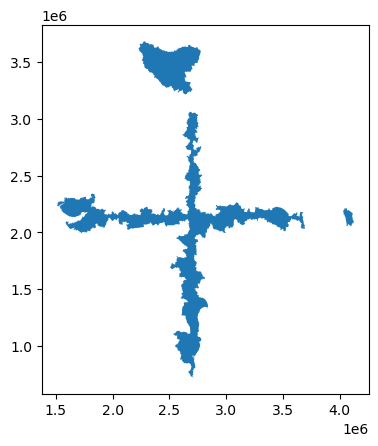

In [143]:
munisMidNS_india.dissolve().overlay(munisMidWE_india.dissolve(), how="union",keep_geom_type=True).dissolve().plot()

In [144]:
muniMidindia=munisMidNS_india.dissolve().overlay(munisMidWE_india.dissolve(), how="union",keep_geom_type=True).dissolve()
muniMidindia

,geometry,f_code_1_1,coc_1_1,ypc_1_1,f_code_1_2,coc_1_2,ypc_1_2
0,MULTIPOLYGON Z (((2711491.376 899838.961 0.000...,FA001,IND,0.0,FA001,IND,0.0


In [146]:
muniMidindia['zone']='middles'
muniMidindia=muniMidindia.loc[:,['f_code_1_1','zone','geometry']]   
muniMidindia

,f_code_1_1,zone,geometry
0,FA001,middles,MULTIPOLYGON Z (((2711491.376 899838.961 0.000...


<Axes: >

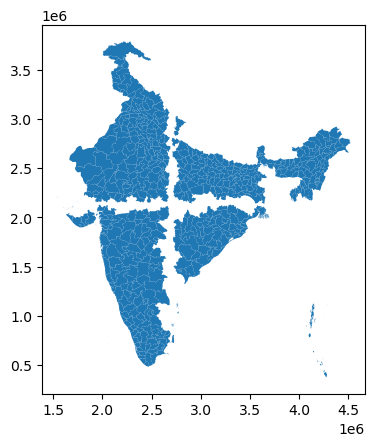

In [148]:
india_municipalities.overlay(muniMidindia, how='difference').plot()

<Axes: >

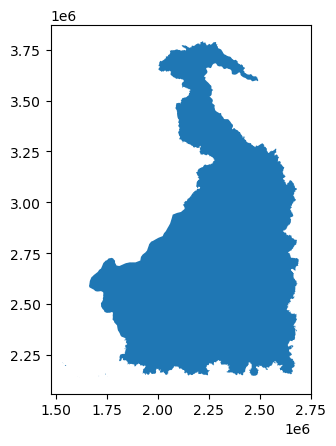

In [149]:
India_topLeft.overlay(muniMidindia, how='difference').plot()

<Axes: >

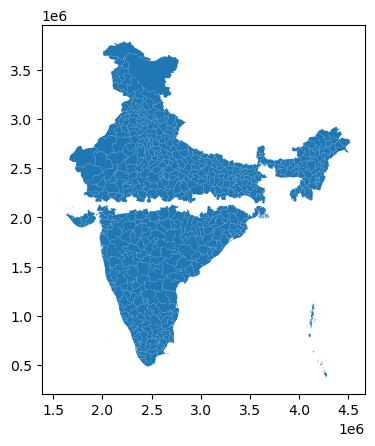

In [150]:
MunisN_india.overlay(MunisS_india, how="symmetric_difference",keep_geom_type=False).plot()

<Axes: >

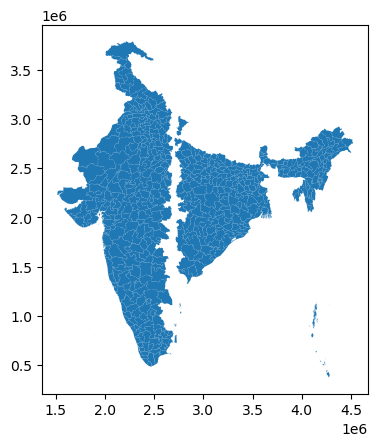

In [151]:
MunisW_india.overlay(MunisE_india, how="symmetric_difference",keep_geom_type=False).plot()

In [152]:
India_AirTopLeft_hull=India_AirTopLeft.dissolve().convex_hull
India_AirTopRight_hull=India_AirTopRight.dissolve().convex_hull
India_AirBottomLeft_hull=India_AirBottomLeft.dissolve().convex_hull
India_AirBottomRight_hull=India_AirBottomRight.dissolve().convex_hull

<Axes: >

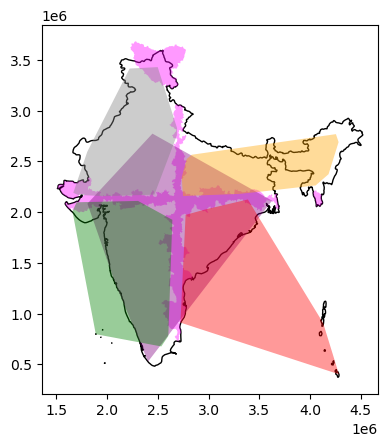

In [153]:
base = india.plot(color='white', edgecolor='black') #unprojected
muniMidindia.plot(ax=base,facecolor='magenta',alpha=0.4) #unprojected
LargeAirport_hull.plot(ax=base,facecolor='purple',alpha=0.4)
India_AirTopLeft_hull.plot(ax=base,facecolor='grey', alpha=0.4)
India_AirTopRight_hull.plot(ax=base,facecolor='orange', alpha=0.4)
India_AirBottomLeft_hull.plot(ax=base,facecolor='green', alpha=0.4)
India_AirBottomRight_hull.plot(ax=base,facecolor='red', alpha=0.4)

In [154]:
# Exercise 6 - Terminado